In [1]:
import Pkg
Pkg.activate("/home/matteo/Projects/AAV2/analysis/logos")

  Activating project at `~/Projects/AAV2/analysis/logos`


In [ ]:
Pkg.update()

In [2]:
using JLD2, PyPlot, SequenceLogos, BioSeqInt

[ Info: Precompiling SequenceLogos [7a3f67ce-6eeb-4904-9da4-2cbd106a5944]


In [3]:
using SequenceLogos: logo_from_matrix, plot_sequence_logo, aa_color, plot_sequence_logo_aa

In [4]:
include("logo_utils.jl")

frequency_matrix (generic function with 1 method)

In [5]:
@load "data_for_logos.jld2"

6-element Vector{Symbol}:
 :sequences_int_exp12
 :sequences_int_exp3
 :ls_experiment3_filtered
 :ls_threshold
 :θexperiment3_cnn
 :threshold_experiment3

In [6]:
wt = load("/home/matteo/Projects/AAV2/my_data/data_experiment1.jld2")["wt_aa"]

"DEEEIRTTNPVATEQYGSVSTNLQRGNR"

In [7]:
true_positives_idx = findall((ls_experiment3_filtered .>= ls_threshold).*(θexperiment3_cnn .>= threshold_experiment3))
false_negatives_idx = findall((ls_experiment3_filtered .< ls_threshold).*(θexperiment3_cnn .>= threshold_experiment3))
true_negatives_idx = findall((ls_experiment3_filtered .< ls_threshold).*(θexperiment3_cnn .< threshold_experiment3));

In [9]:
w_true_positives=frequency_matrix(sequences_int_exp3[true_positives_idx])
w_false_negatives=frequency_matrix(sequences_int_exp3[false_negatives_idx]);
w_train = frequency_matrix(sequences_int_exp12);
w_true_negatives = frequency_matrix(sequences_int_exp3[true_negatives_idx]);

In [10]:
alphabet=replace(String(int2aa.(1:21)), '-'=>'X')

"ACDEFGHIKLMNPQRSTVWYX"

In [16]:
gaps_true_positives = findall(w_true_positives[21, :] .== 1.0)
gaps_false_negatives = findall(w_false_negatives[21, :] .== 1.0)
gaps_train = findall(w_train[21, :] .== 1.0)
gaps_true_negatives = findall(w_true_negatives[21, :] .== 1.0);

In [27]:
issubset(collect(minimum(gaps_true_positives):maximum(gaps_true_positives)), gaps_true_positives)

true

In [35]:
last_site_true_positives = minimum(gaps_true_positives)-1

41

In [28]:
issubset(collect(minimum(gaps_false_negatives):maximum(gaps_false_negatives)), gaps_false_negatives)

true

In [36]:
last_site_false_negatives = minimum(gaps_false_negatives)-1

41

In [29]:
issubset(collect(minimum(gaps_train):maximum(gaps_train)), gaps_train)

true

In [37]:
last_site_train = minimum(gaps_train)-1

42

In [30]:
issubset(collect(minimum(gaps_true_negatives):maximum(gaps_true_negatives)), gaps_true_negatives)

true

In [38]:
last_site_true_negatives = minimum(gaps_true_negatives)-1

43

In [40]:
logo_true_positives = logo_from_matrix(w_true_positives[:, 1:last_site_true_positives], alphabet);
logo_false_negatives = logo_from_matrix(w_false_negatives[:, 1:last_site_false_negatives], alphabet);
logo_train = logo_from_matrix(w_train[:, 1:last_site_train], alphabet);
logo_true_negatives = logo_from_matrix(w_true_negatives[:, 1:last_site_true_negatives], alphabet);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


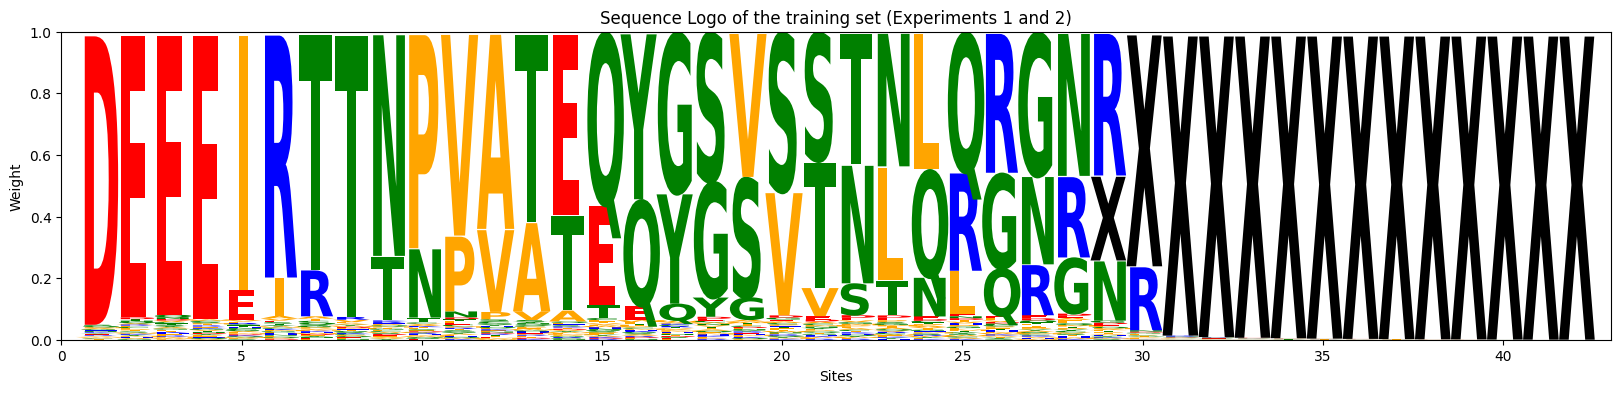

PyObject Text(24.00000000000002, 0.5, 'Weight')

In [41]:
figure(figsize=(20,4))
plot_sequence_logo_aa(logo_train)
title("Sequence Logo of the training set (Experiments 1 and 2)")
xlabel("Sites")
ylabel("Weight")

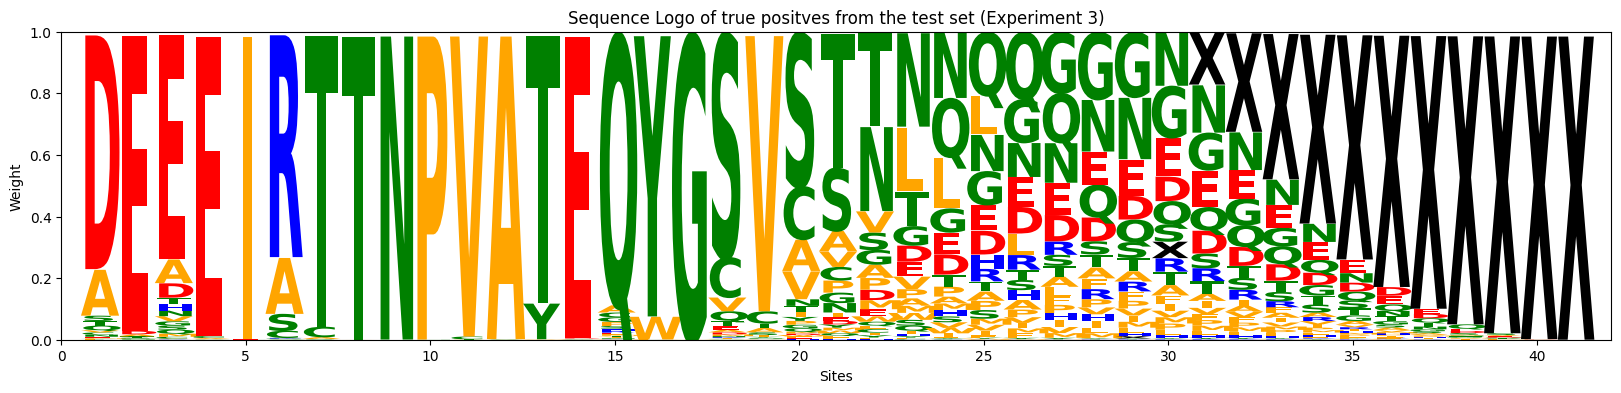

PyObject Text(24.00000000000002, 0.5, 'Weight')

In [42]:
figure(figsize=(20,4))
plot_sequence_logo_aa(logo_true_positives)
title("Sequence Logo of true positves from the test set (Experiment 3)")
xlabel("Sites")
ylabel("Weight")

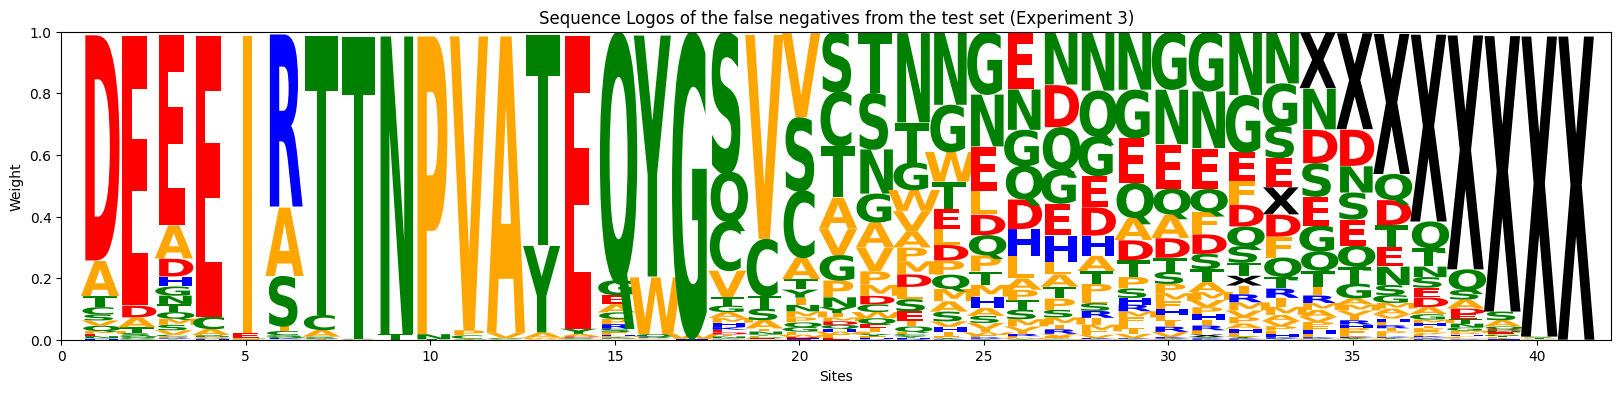

PyObject Text(24.00000000000002, 0.5, 'Weight')

In [43]:
figure(figsize=(20,4))
plot_sequence_logo_aa(logo_false_negatives)
title("Sequence Logos of the false negatives from the test set (Experiment 3)")
xlabel("Sites")
ylabel("Weight")

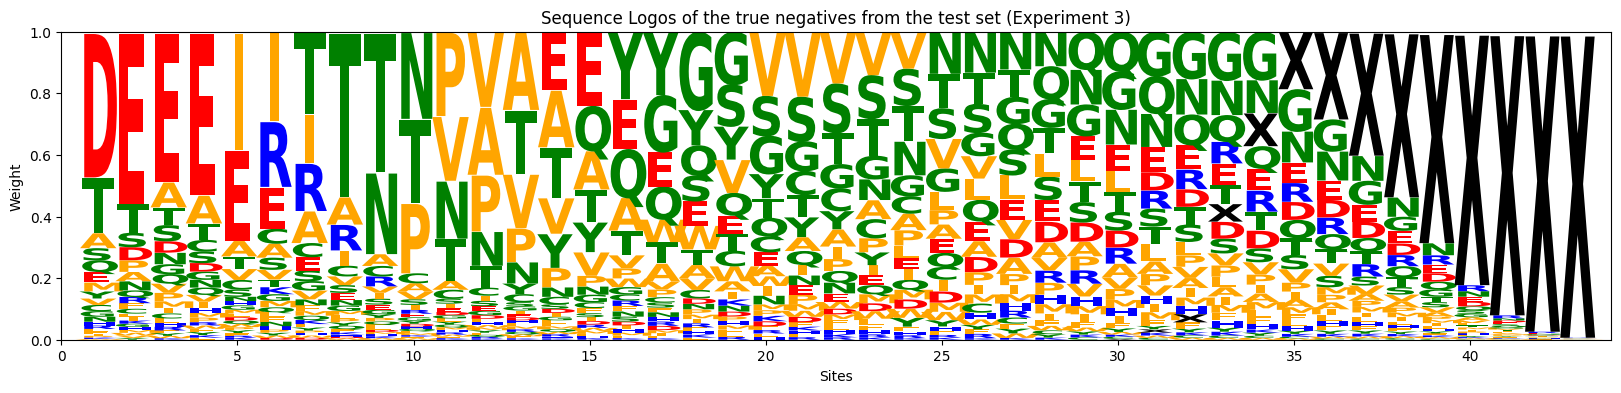

PyObject Text(24.00000000000002, 0.5, 'Weight')

In [44]:
figure(figsize=(20,4))
plot_sequence_logo_aa(logo_true_negatives)
title("Sequence Logos of the true negatives from the test set (Experiment 3)")
xlabel("Sites")
ylabel("Weight")